In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [14]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [16]:
df.duplicated('CustomerId').sum()

0

In [17]:
df = df.set_index('CustomerId')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [19]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
df.replace({'Geography' : {'France':2,'Germany':1,'Spain' : 0}},inplace = True)

In [21]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [22]:
df.replace({'Gender' : {'Male' : 0,'Female':1}},inplace = True)

In [23]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [24]:
df.replace({'Num Of Products' : {1:0,2:1,3:1,4:1}},inplace = True)

In [25]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [26]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [27]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [28]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<AxesSubplot:>

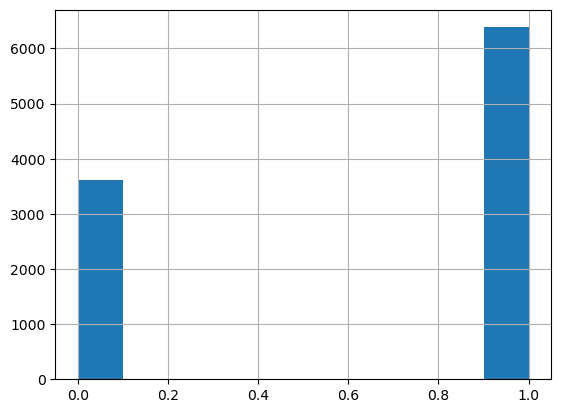

In [29]:
df['Zero Balance'].hist()

In [30]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Features

In [31]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [32]:
x = df.drop(['Surname','Churn'],axis = 1)

In [33]:
y = df['Churn']

In [34]:
x.shape, y.shape

((10000, 11), (10000,))

OverSampling and under Sampling

In [35]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

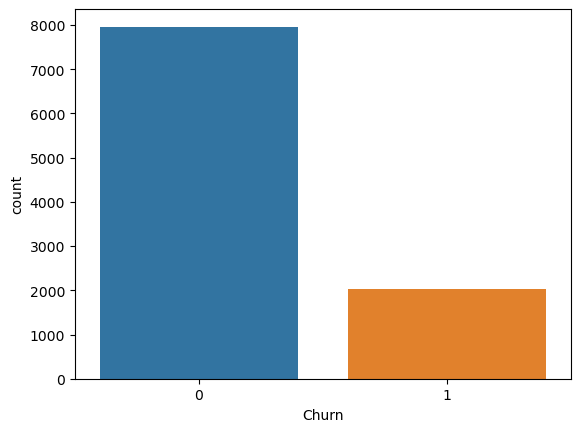

In [36]:
sns.countplot(x = 'Churn',data = df)

In [37]:
x.shape, y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler


In [39]:
!pip show imbalanced-learn


Name: imbalanced-learn
Version: 0.11.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: c:\users\admin\anaconda3\lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [40]:
!pip install imbalanced-learn

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [42]:
rus = RandomUnderSampler(random_state=2529)

In [43]:
x_rus, y_rus = rus.fit_resample(x,y)

In [44]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [45]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

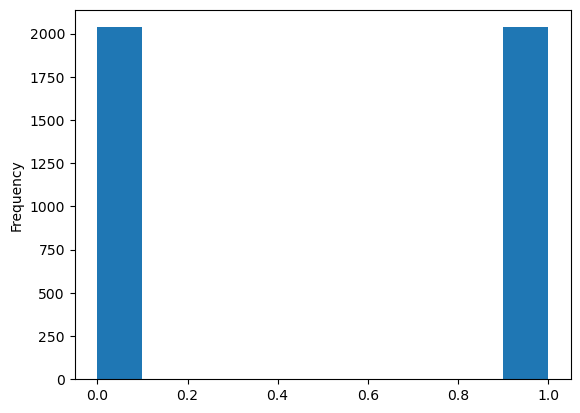

In [46]:
y_rus.plot(kind ='hist')

# Random Over Sampling

In [48]:
from imblearn.under_sampling import RandomOverSampler

ImportError: cannot import name 'RandomOverSampler' from 'imblearn.under_sampling' (C:\Users\ADMIN\anaconda3\lib\site-packages\imblearn\under_sampling\__init__.py)

In [49]:
!pip install imbalanced-learn

In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
ros = RandomOverSampler(random_state=2529)

In [52]:
x_ros, y_ros = ros.fit_resample(x,y)

In [53]:
x_ros.shape,y_ros.shape, x.shape,y.shape


((15926, 11), (15926,), (10000, 11), (10000,))

In [54]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [55]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

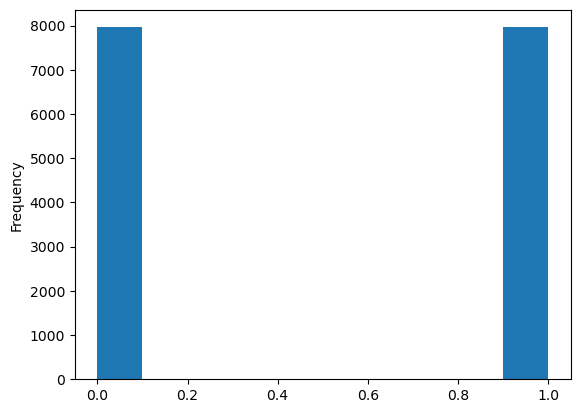

In [56]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=25)

# Split Random Under Sample Data

In [59]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=30)

# Split Random Over Sample Data

In [78]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=30)

# Standardize Features

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [69]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [70]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [72]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [73]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [74]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [79]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] =sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


# Support Vector Machine Classifier

In [81]:
from sklearn.svm import SVC

In [82]:
svc = SVC()

In [83]:
svc.fit(x_train,y_train)

SVC()

In [85]:
y_pred =svc.predict(x_test)

# Model Accuracy

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

In [87]:
confusion_matrix(y_test,y_pred)

array([[2374,   45],
       [ 421,  160]], dtype=int64)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



# Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {'C':[0.1,1,10],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf'],
             'class_weight':['balanced']}

In [91]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [92]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [93]:
grid_predictions = grid.predict(x_test)

In [94]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]], dtype=int64)

In [95]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



In [96]:
svc_rus = SVC()

In [97]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [98]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_rus.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [99]:
grid_predictions_rus =grid_rus.predict(x_test_rus)

In [100]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[583,  13],
       [121, 506]], dtype=int64)

In [101]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       596
           1       0.97      0.81      0.88       627

    accuracy                           0.89      1223
   macro avg       0.90      0.89      0.89      1223
weighted avg       0.90      0.89      0.89      1223

